#**스마트폰 센서 데이터 기반 모션 분류**
# 단계2 : 기본 모델링


## 0.미션

* 데이터 전처리
    * 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리 수행
* 다양한 알고리즘으로 분류 모델 생성
    * 최소 4개 이상의 알고리즘을 적용하여 모델링 수행
    * 성능 비교
    * 각 모델의 성능을 저장하는 별도 데이터 프레임을 만들고 비교
* 옵션 : 다음 사항은 선택사항입니다. 시간이 허용하는 범위 내에서 수행하세요.
    * 상위 N개 변수를 선정하여 모델링 및 성능 비교
        * 모델링에 항상 모든 변수가 필요한 것은 아닙니다.
        * 변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교하세요.
        * 상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것입니다.

## 1.환경설정

### (1) 라이브러리 불러오기

* 세부 요구사항
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 필요하다고 판단되는 라이브러리를 추가하세요.
from sklearn.metrics import *

* 함수 생성

In [ ]:
# 변수의 특성 중요도 계산하기
def plot_feature_importance(importance, names, result_only = False, topn = 15):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df

### (2) 데이터 불러오기

* 주어진 데이터셋
    * data01_train.csv : 학습 및 검증용
* 세부 요구사항
    - 전체 데이터 'data01_train.csv' 를 불러와 'data' 이름으로 저장합니다.
        - data에서 변수 subject는 삭제합니다.
    - 데이터프레임에 대한 기본 정보를 확인합니다.( .head(), .shape 등)

#### 1) 데이터 로딩

In [ ]:
data = pd.read_csv("data01_train.csv")
data = data.drop('subject', axis=1)

#### 2) 기본 정보 조회

In [ ]:
data.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING


In [ ]:
data.shape

(5881, 562)

In [ ]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,...,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000
mean,0.274811,-0.017799,-0.109396,-0.603138,-0.509815,-0.604058,-0.628151,-0.525944,-0.605374,-0.465490,...,0.126955,-0.305883,-0.623548,0.008524,-0.001185,0.009340,-0.007099,-0.491501,0.059299,-0.054594
std,0.067614,0.039422,0.058373,0.448807,0.501815,0.417319,0.424345,0.485115,0.413043,0.544995,...,0.249176,0.322808,0.310371,0.339730,0.447197,0.608190,0.476738,0.509069,0.297340,0.278479
min,-0.503823,-0.684893,-1.000000,-1.000000,-0.999844,-0.999667,-1.000000,-0.999419,-1.000000,-1.000000,...,-0.965725,-0.979261,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.980143
25%,0.262919,-0.024877,-0.121051,-0.992774,-0.977680,-0.980127,-0.993602,-0.977865,-0.980112,-0.936067,...,-0.021610,-0.541969,-0.845985,-0.122361,-0.294369,-0.481718,-0.373345,-0.811397,-0.018203,-0.141555
50%,0.277154,-0.017221,-0.108781,-0.943933,-0.844575,-0.856352,-0.948501,-0.849266,-0.849896,-0.878729,...,0.133887,-0.342923,-0.712677,0.010278,0.005146,0.011448,-0.000847,-0.709441,0.182893,0.003951
75%,0.288526,-0.010920,-0.098163,-0.242130,-0.034499,-0.262690,-0.291138,-0.068857,-0.268539,-0.013690,...,0.288944,-0.127371,-0.501158,0.154985,0.285030,0.499857,0.356236,-0.511330,0.248435,0.111932
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,0.977344,0.478157,1.000000


## **2. 데이터 전처리**

* 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리를 수행한다.


### (1) 데이터 분할1 : x, y

* 세부 요구사항
    - x, y로 분할합니다.

In [ ]:
target = 'Activity'

x = data.drop(target, axis=1)
y = data.loc[:, target]

### (2) 스케일링(필요시)


* 세부 요구사항
    - 스케일링을 필요로 하는 알고리즘 사용을 위해서 코드 수행
    - min-max 방식 혹은 standard 방식 중 한가지 사용.

In [ ]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
x_s = scaler.fit_transform(x)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### (3) 데이터분할2 : train, validation

* 세부 요구사항
    - train : val = 8 : 2 혹은 7 : 3
    - random_state 옵션을 사용하여 다른 모델과 비교를 위해 성능이 재현되도록 합니다.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_s, y,
                                                 test_size = .3,
                                                 random_state=1)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((4116, 561), (1765, 561), (4116,), (1765,))

## **3. 기본 모델링**



* 세부 요구사항
    - 최소 4개 이상의 알고리즘을 적용하여 모델링을 수행한다.
    - 각 알고리즘별로 전체 변수로 모델링, 상위 N개 변수를 선택하여 모델링을 수행하고 성능 비교를 한다.
    - (옵션) 알고리즘 중 1~2개에 대해서, 변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교.
        * 상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것이다.

### (1) 알고리즘1 :

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='rbf',C=100.0)

In [ ]:
model.fit(x_train, y_train)

SVC(C=100.0)

In [ ]:
y_pred=model.predict(x_val)

In [ ]:
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[331   0   0   0   0   0]
 [  0 285   7   0   0   0]
 [  0  12 319   0   0   0]
 [  0   0   0 297   0   0]
 [  0   0   0   0 239   0]
 [  0   0   0   0   0 275]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       0.96      0.98      0.97       292
           2       0.98      0.96      0.97       331
           3       1.00      1.00      1.00       297
           4       1.00      1.00      1.00       239
           5       1.00      1.00      1.00       275

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



In [ ]:
result = {}
result['SVM_rbf'] = model.score(x_val, y_val)

### (2) 알고리즘2 :

In [ ]:
from xgboost import XGBClassifier


# 선언하기
model2 = XGBClassifier(max_depth=5,
                    random_state=1)

In [ ]:
model2.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred=model2.predict(x_val)

In [ ]:
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[331   0   0   0   0   0]
 [  0 288   4   0   0   0]
 [  0   6 325   0   0   0]
 [  0   0   0 297   0   0]
 [  0   0   0   1 238   0]
 [  0   0   0   0   0 275]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       0.98      0.99      0.98       292
           2       0.99      0.98      0.98       331
           3       1.00      1.00      1.00       297
           4       1.00      1.00      1.00       239
           5       1.00      1.00      1.00       275

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



In [ ]:
result['XGBoost'] = model.score(x_val, y_val)

,feature_name,feature_importance
0,fBodyAccJerk-max()-Z,0.096607
1,fBodyAccMag-mad(),0.085101
2,fBodyAccJerk-std()-Y,0.052958
3,tGravityAcc-mean()-X,0.048203
4,fBodyAcc-skewness()-X,0.035975
5,tBodyAccJerk-max()-Y,0.035078
6,fBodyAccMag-std(),0.033166
7,tBodyGyroJerk-mad()-X,0.031900
8,fBodyBodyGyroMag-meanFreq(),0.027511
9,"fBodyAcc-bandsEnergy()-1,8.2",0.025742


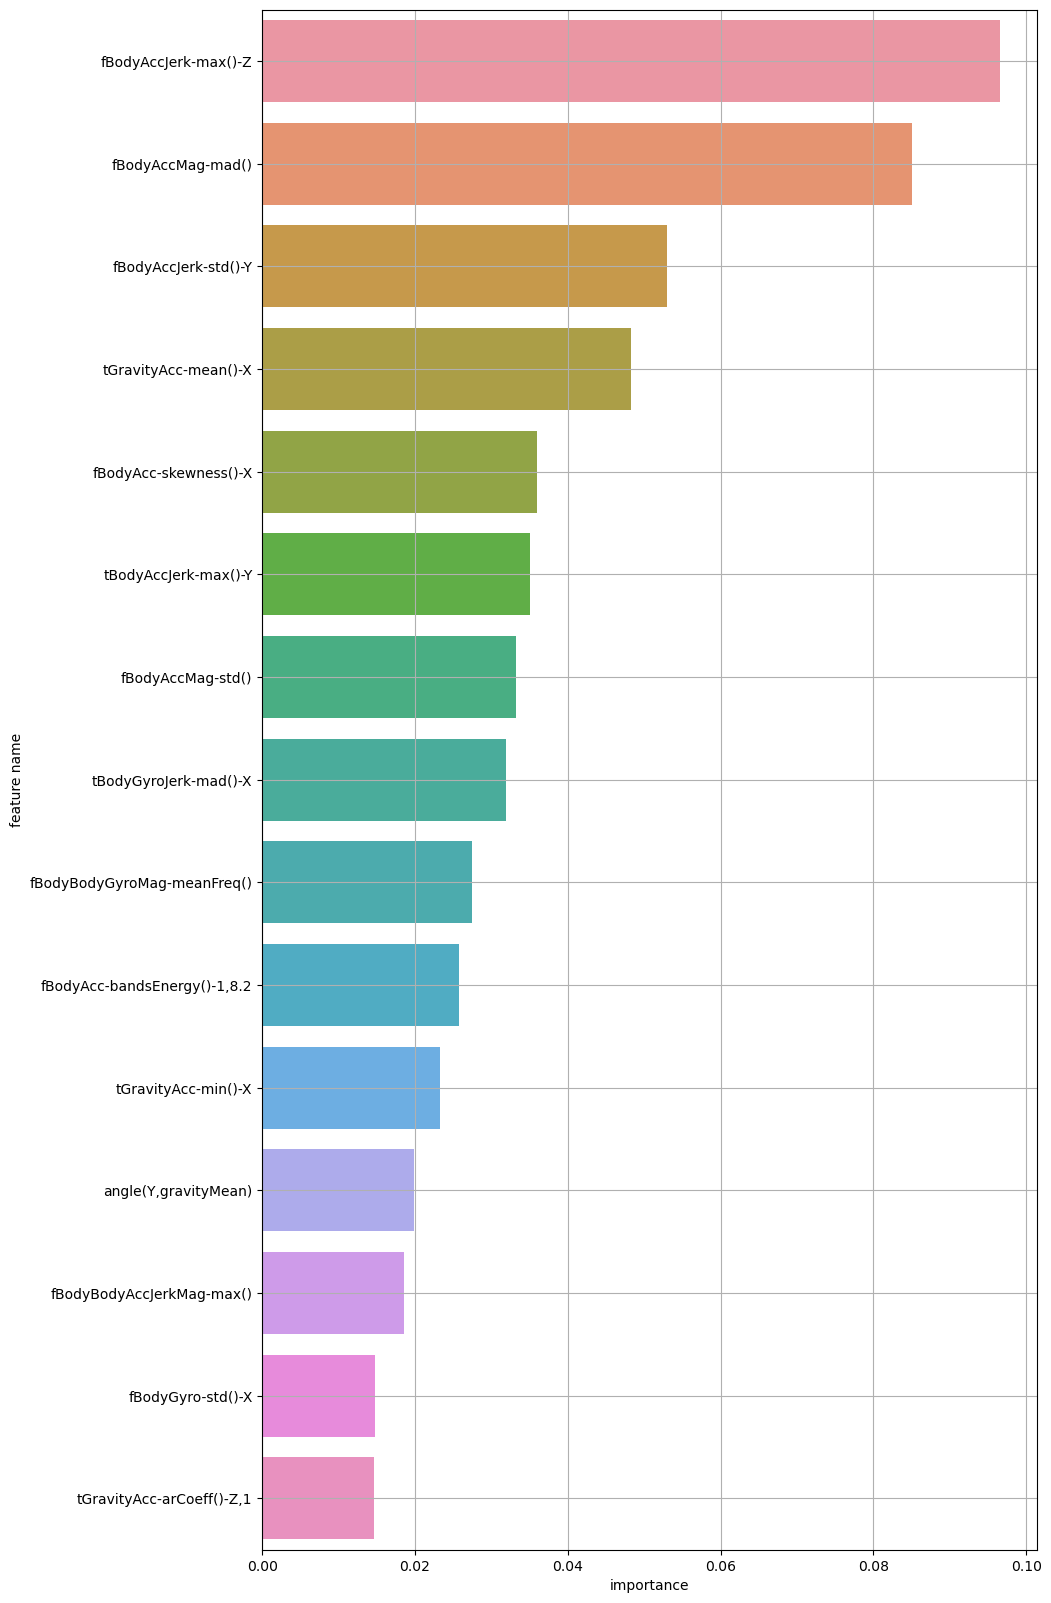

In [ ]:
importance = model2.feature_importances_
names = list(x)
plot_feature_importance(importance, names)

### (3) 알고리즘3 :

In [ ]:
from lightgbm import LGBMClassifier

# 선언하기
model3 = LGBMClassifier(max_depth=5,
                    random_state=1,
                       verbose = -1)

In [ ]:
model3.fit(x_train, y_train)

LGBMClassifier(max_depth=5, random_state=1, verbose=-1)

In [ ]:
y_pred=model3.predict(x_val)

In [ ]:
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[331   0   0   0   0   0]
 [  0 287   5   0   0   0]
 [  0   6 325   0   0   0]
 [  0   0   0 297   0   0]
 [  0   0   0   0 239   0]
 [  0   0   0   0   0 275]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       0.98      0.98      0.98       292
           2       0.98      0.98      0.98       331
           3       1.00      1.00      1.00       297
           4       1.00      1.00      1.00       239
           5       1.00      1.00      1.00       275

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



In [ ]:
result['LGBM'] = model.score(x_val, y_val)

,feature_name,feature_importance
0,tGravityAcc-min()-Y,274
1,tGravityAcc-energy()-Y,254
2,tGravityAcc-max()-Y,214
3,"tBodyAcc-correlation()-X,Y",204
4,"angle(X,gravityMean)",202
5,tGravityAcc-mean()-Y,173
6,"tBodyGyro-correlation()-Y,Z",161
7,"fBodyAcc-bandsEnergy()-1,8",158
8,tBodyAcc-entropy()-X,139
9,fBodyAcc-max()-X,136


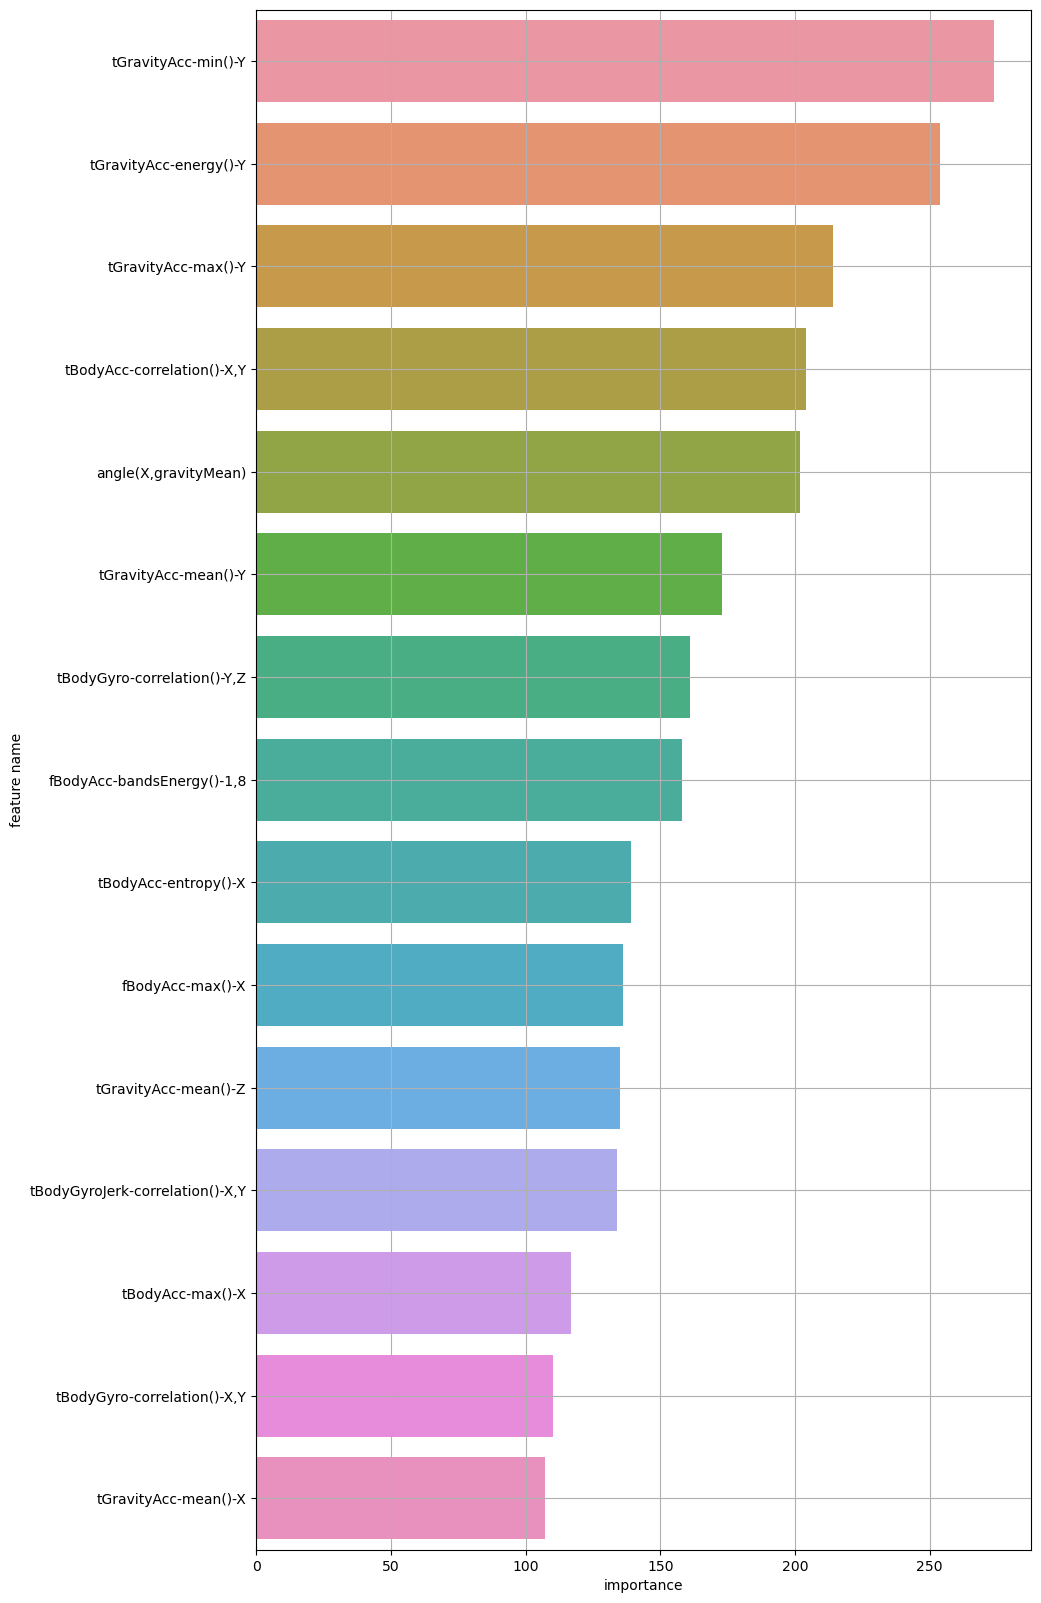

In [ ]:
importance = model3.feature_importances_
names = list(x)
plot_feature_importance(importance, names)

### (4) 알고리즘4 :

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(random_state=5)
model4.fit(x_train, y_train)

RandomForestClassifier(random_state=5)

In [ ]:
y_pred = model4.predict(x_val)

In [ ]:
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[331   0   0   0   0   0]
 [  0 276  16   0   0   0]
 [  0  14 317   0   0   0]
 [  0   0   0 294   1   2]
 [  0   0   0   2 232   5]
 [  0   0   0   1   4 270]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       0.95      0.95      0.95       292
           2       0.95      0.96      0.95       331
           3       0.99      0.99      0.99       297
           4       0.98      0.97      0.97       239
           5       0.97      0.98      0.98       275

    accuracy                           0.97      1765
   macro avg       0.97      0.97      0.97      1765
weighted avg       0.97      0.97      0.97      1765



In [ ]:
result['RandomForest'] = model4.score(x_val, y_val)

,feature_name,feature_importance
0,tGravityAcc-max()-X,0.039125
1,tGravityAcc-energy()-X,0.034055
2,"angle(X,gravityMean)",0.032828
3,tGravityAcc-max()-Y,0.027387
4,"angle(Y,gravityMean)",0.026622
5,tGravityAcc-min()-X,0.025836
6,tGravityAcc-min()-Y,0.025568
7,tGravityAcc-mean()-Y,0.022081
8,tGravityAcc-mean()-X,0.021430
9,tBodyAccJerk-mad()-X,0.016925


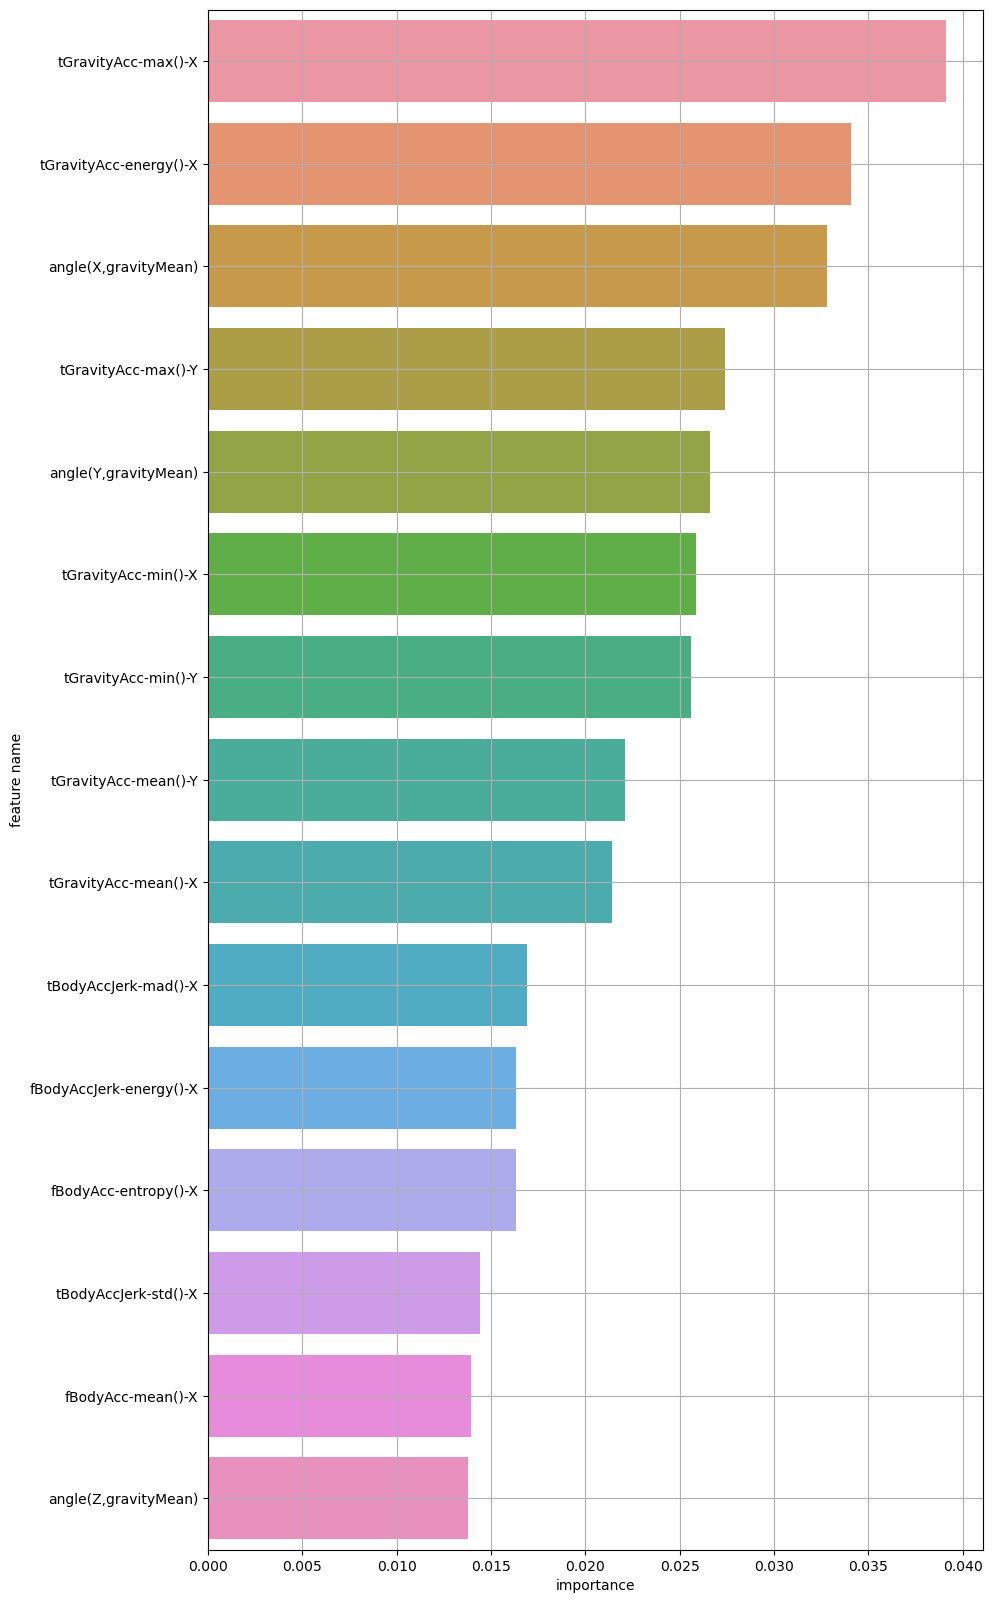

In [ ]:
importance = model4.feature_importances_
names = list(x)
plot_feature_importance(importance, names)

In [ ]:
result

{'SVM_rbf': 0.9892351274787535,
 'XGBoost': 0.9892351274787535,
 'LGBM': 0.9892351274787535,
 'RandomForest': 0.9745042492917847}